# Introduction to _cohorts_

By Nick Giangreco,

Tatonetti Lab, 

Columbia University,

Created on:

In [1]:
!date

Wed Nov 28 10:21:22 EST 2018


_cohorts_ provides feasible data management for clinical proteomic experiments. Below we go over examples of loading and retrieving sample data. 

<hr>

load libraries

In [2]:
import cohorts
import pandas as pd
import numpy as np

package doctstring

In [3]:
print(cohorts.Cohort.__doc__)


	Patient cohort object for patient proteomics data.

	Dataframes, variables, and functions facilitating the processing, analysis, and integration of the cohort data.

	Parameters
	----------
	cohort: str
		name of the patient cohort

	file_dir: str
		directory where replicate dataframe and 
		sample group membership dataframe file names are located

	replicates_file: str
		name of the replicates dataframe file

		A proteins x B replicates
		comma (*.csv) or tab (*.tsv) delimited

		replicate = "SampleName" + "_Rep[0-9]"

	sample_groups_file: str
		name of the sample group file
		comma (*.csv) or tab (*.tsv) delimited

		N groups x M samples

		sample = "SampleName"

	data_dir: str
		directory where extra data files are located
		
	uniprot_file: str
		name of the uniprot database flat file located in data_dir

	Examples
	--------
	>>>c = cohorts.Cohort(cohort='cohort_name',
		file_dir="path/to/files/"
		replicates_file="file_name",
		sample_groups_file="sample_groups_file_name",
		data

reference location of sample data files and create cohort object

In [4]:
top = "./"
file_dirs ={ 'my_cohort' : top+"sample_data/"}
replicates_files = { 'my_cohort' : "df_replicates.tsv"}
sample_groups_files = { 'my_cohort' : "df_sample_groups.tsv"}
cohort = 'my_cohort'
c = cohorts.Cohort(cohort=cohort,
                   data_dir="../data/",file_dir=file_dirs[cohort],
                   replicates_file=replicates_files[cohort],
                   sample_groups_file=sample_groups_files[cohort])

/anaconda/envs/cohorts_test/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


list and display all object attributes

In [5]:
for attribute in c.__dict__.keys():
    attr = getattr(c,attribute)
    print("======")
    print("Attribute:",attribute)
    display(attr)

Attribute: cwd


'/Users/npg2108/GitHub/cohorts'

Attribute: data_dir


'../data/'

Attribute: file_dir


'./sample_data/'

Attribute: cohort


'my_cohort'

Attribute: replicates_file


'./sample_data/df_replicates.tsv'

Attribute: sample_groups_file


'./sample_data/df_sample_groups.tsv'

Attribute: uniprot_file


None

Attribute: raw_samples


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
E7EX29,0.326892,3.654187,1.178828,0.952198,0.481382,4.607199,1.767626,6.878535,2.549322,0.640943
P62191,1.305690,1.520638,1.088975,1.914694,2.792240,1.674703,0.761181,0.307577,1.536306,0.960943
Q99460,0.268861,2.112616,2.580799,3.810912,0.579824,2.572014,3.723716,3.113931,0.786957,5.515424
P52209,1.030356,1.969420,2.352108,0.843651,0.818597,0.866628,4.318617,5.224393,0.440989,1.772969
P08253,0.745683,2.400959,0.737756,3.837022,3.282232,0.784408,0.756681,1.641285,0.553400,0.300602
P27338,1.450879,2.200017,1.755909,0.349598,2.336102,3.265970,4.673422,1.521308,2.563856,3.251974
P15144,1.385568,5.042631,3.193673,1.484842,0.617652,1.822239,2.619160,1.322924,2.570147,3.497272
P05067,1.368769,2.114112,0.667397,4.378646,5.884459,1.111551,4.260162,1.268078,1.059377,2.685142
Q9UJX5,4.204979,1.440007,1.161461,0.862510,0.456723,1.587281,0.747233,2.145478,1.071699,2.129249
Q8N302,2.703738,1.463856,2.467961,3.519811,0.766398,1.586285,0.954618,1.708661,0.723758,1.318812


Attribute: raw_replicates


,S1_Rep1,S1_Rep2,S2_Rep1,S2_Rep2,S3_Rep1,S3_Rep2,S4_Rep1,S4_Rep2,S5_Rep1,S5_Rep2,S6_Rep1,S6_Rep2,S7_Rep1,S7_Rep2,S8_Rep1,S8_Rep2,S9_Rep1,S9_Rep2,S10_Rep1,S10_Rep2
E7EX29,0.526654,0.127130,5.199028,2.109347,2.249255,0.108401,0.875591,1.028805,0.920000,0.042764,4.221320,4.993079,0.691645,2.843608,2.702805,11.054266,0.056939,5.041705,0.977477,0.304410
P62191,0.791281,1.820099,0.758876,2.282401,0.675158,1.502792,0.352030,3.477358,3.310814,2.273665,0.658391,2.691015,0.432696,1.089667,0.147597,0.467557,0.604896,2.467717,1.151451,0.770435
Q99460,0.035922,0.501800,0.195793,4.029438,4.635607,0.525992,7.392602,0.229223,1.037541,0.122106,4.192949,0.951078,5.367599,2.079834,5.159862,1.068000,1.338310,0.235605,8.307991,2.722858
P52209,1.928400,0.132313,0.923237,3.015603,1.805835,2.898382,0.208677,1.478625,1.456573,0.180620,1.046998,0.686258,2.455698,6.181536,9.570667,0.878119,0.005764,0.876215,2.787344,0.758593
P08253,0.850043,0.641323,3.698615,1.103303,0.076704,1.398809,2.013129,5.660915,4.112593,2.451870,0.587017,0.981799,0.649270,0.864091,1.813152,1.469418,0.608286,0.498515,0.154020,0.447184
P27338,2.504065,0.397693,4.305065,0.094969,0.788371,2.723448,0.396713,0.302483,3.477549,1.194654,0.836833,5.695107,7.138837,2.208008,0.561346,2.481271,3.406206,1.721506,0.396244,6.107705
P15144,0.907281,1.863856,6.259852,3.825411,5.288734,1.098613,0.540793,2.428891,0.195651,1.039652,3.192662,0.451817,0.316526,4.921793,0.587720,2.058128,3.562867,1.577427,2.589447,4.405096
P05067,0.760780,1.976759,1.736841,2.491382,0.790444,0.544351,6.843504,1.913787,7.910964,3.857954,1.874413,0.348689,2.120594,6.399730,0.904973,1.631184,0.301007,1.817747,0.214809,5.155476
Q9UJX5,7.875030,0.534928,0.876710,2.003304,1.054773,1.268148,0.455250,1.269770,0.749670,0.163776,1.548252,1.626310,1.237483,0.256983,2.857613,1.433344,1.859459,0.283939,3.204500,1.053998
Q8N302,4.864815,0.542662,0.481945,2.445767,4.673145,0.262777,5.679859,1.359762,0.520990,1.011805,2.345876,0.826695,0.725987,1.183249,0.033972,3.383350,0.567743,0.879773,0.045530,2.592093


Attribute: replicates_hq


None

Attribute: trans_replicates_hq


None

Attribute: samples_hq


None

Attribute: trans_samples_hq


None

Attribute: sample_replicate_dictionary


{'S1': ['S1_Rep1', 'S1_Rep2'],
 'S10': ['S10_Rep1', 'S10_Rep2'],
 'S2': ['S2_Rep1', 'S2_Rep2'],
 'S3': ['S3_Rep1', 'S3_Rep2'],
 'S4': ['S4_Rep1', 'S4_Rep2'],
 'S5': ['S5_Rep1', 'S5_Rep2'],
 'S6': ['S6_Rep1', 'S6_Rep2'],
 'S7': ['S7_Rep1', 'S7_Rep2'],
 'S8': ['S8_Rep1', 'S8_Rep2'],
 'S9': ['S9_Rep1', 'S9_Rep2']}

Attribute: samples


['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']

Attribute: replicates


['S1_Rep1',
 'S1_Rep2',
 'S2_Rep1',
 'S2_Rep2',
 'S3_Rep1',
 'S3_Rep2',
 'S4_Rep1',
 'S4_Rep2',
 'S5_Rep1',
 'S5_Rep2',
 'S6_Rep1',
 'S6_Rep2',
 'S7_Rep1',
 'S7_Rep2',
 'S8_Rep1',
 'S8_Rep2',
 'S9_Rep1',
 'S9_Rep2',
 'S10_Rep1',
 'S10_Rep2']

Attribute: proteins


array(['E7EX29', 'P62191', 'Q99460', 'P52209', 'P08253', 'P27338',
       'P15144', 'P05067', 'Q9UJX5', 'Q8N302', 'P03950', 'Q9Y5C1'],
      dtype=object)

Attribute: replicate_groups


,S10_Rep1,S10_Rep2,S1_Rep1,S1_Rep2,S2_Rep1,S2_Rep2,S3_Rep1,S3_Rep2,S4_Rep1,S4_Rep2,S5_Rep1,S5_Rep2,S6_Rep1,S6_Rep2,S7_Rep1,S7_Rep2,S8_Rep1,S8_Rep2,S9_Rep1,S9_Rep2
trt,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
ref,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
cov,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Attribute: sample_groups


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
trt,1,1,1,1,1,0,0,0,0,0
ref,0,0,0,0,0,1,1,1,1,1
cov,1,1,0,0,0,0,0,0,0,0


Attribute: tidy_replicate_groups


,Replicates,Groups
2,S1_Rep1,trt
3,S1_Rep2,trt
4,S2_Rep1,trt
5,S2_Rep2,trt
6,S3_Rep1,trt
7,S3_Rep2,trt
8,S4_Rep1,trt
9,S4_Rep2,trt
10,S5_Rep1,trt
11,S5_Rep2,trt


Attribute: tidy_sample_groups


,Samples,Groups
0,trt,S1
2,cov,S1
3,trt,S2
5,cov,S2
6,trt,S3
9,trt,S4
12,trt,S5
16,ref,S6
19,ref,S7
22,ref,S8


Attribute: groups


array(['trt', 'ref', 'cov'], dtype=object)

Attribute: ref


array('trt', dtype=object)

Attribute: treat


array('ref', dtype=object)

Attribute: data


{}

Attribute: params


{}

For each cohort object, there are attributes that:

* define the location of the input data,
* store fields parsed from the input data, such proteins, samples, datasets (as pandas dataframes), etc. 
* store further processed data (these fields, the *\_hq attributes, are currently empty). These would be filled after an additional processing step outlined below 
* store cohort-specific data in a dictionary (these are currently empty and can be filled according to the user).

For further processing the data, we would like to transform (or not) the replicate dataset and transform (or not) the samples dataset. 

Below all we do is agregate the replicates of a sample by taking the average:

In [6]:
c.set_replicates_hq(all_reps_quant=True)
c.set_trans_replicates_hq()
c.set_samples_hq()
c.set_trans_samples_hq()

Let's say I want to make sure atleast one replicate per sample was quantified, average all replicates per sample, and then log2 transform the sample data

In [7]:
c.set_replicates_hq(quant_least_reps_per_samps=True,n_reps=1)
c.set_trans_replicates_hq()
c.set_samples_hq(agg='mean')
c.set_trans_samples_hq(trans='log2')

<hr>

There are also some pre-baked analysis functions.

For example, manual\_feature\_extraction will identify any proteins that are present/absent/mixed in samples of one condition or the other. The output is stored in the _data_ attribute and the attribute is 'mfe'

In [8]:
c.set_ref('ref')
c.set_treat('trt')
c.manual_feature_extraction(c.samples_hq)
print([a for a in c.data['mfe'].keys()])
display(c.data['mfe']['main']['df_len'])

ref/trt
ref/cov
['main', 'helper']


,ref/trt,ref/cov
allq_allq,12,12
allq_allnotq,0,0
allq_mixed,0,0
allnotq_allq,0,0
allnotq_allnotq,0,0
allnotq_mixed,0,0
mixed_allq,0,0
mixed_allnotq,0,0
mixed_mixed,0,0


we can view and access sets of proteins exhibiting a certain pattern as below

In [9]:
display(c.data['mfe']['helper']['allq_allq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allq']['df_len'])
print(c.data['mfe']['helper']['allnotq_allq']['df_arr'].iloc[0,0])

,ref/trt,ref/cov
ref/trt,0,0
ref/cov,0,0


,ref/trt,ref/cov
ref/trt,0,0
ref/cov,0,0


,ref/trt,ref/cov
ref/trt,0,0
ref/cov,0,0


,ref/trt,ref/cov
ref/trt,0,0
ref/cov,0,0


set()


we can also perform some parametric/nonparametric hypothesis testing

In [10]:
ht = c.hypothesis_testing(df=c.samples_hq,df_groups=c.sample_groups)
ht

,Protein,Test,Pvalue,Statistic
0,E7EX29,t-test,0.156775,1.562592
1,P03950,t-test,0.197194,1.406564
2,P05067,t-test,0.506047,-0.696160
3,P08253,t-test,0.073529,-2.058517
4,P15144,t-test,0.981081,0.024464
5,P27338,t-test,0.050486,2.299811
6,P52209,t-test,0.296437,1.116946
7,P62191,t-test,0.122399,-1.727213
8,Q8N302,t-test,0.111349,-1.789354
9,Q99460,t-test,0.243459,1.259187


Here's some examples extracting data using cohort object attributes and plotting with object data

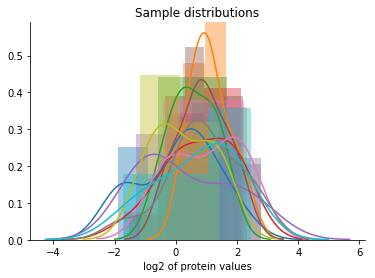

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
df_samples = c.raw_samples.apply(lambda x: np.log2(x))
for n in range(0,df_samples.shape[1],1):
    sns.distplot(df_samples.iloc[:,n])
plt.xlabel('log2 of protein values')
plt.title('Sample distributions')
sns.despine()

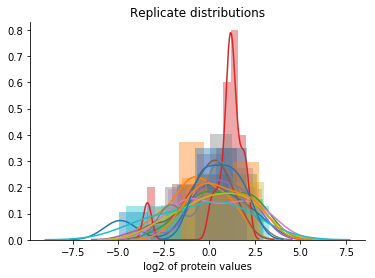

In [12]:
df_replicates = c.raw_replicates.fillna(0).apply(np.log2)
for n in range(0,df_replicates.shape[0],1):
    sns.distplot(df_replicates.iloc[:,n])
plt.xlabel('log2 of protein values')
plt.title('Replicate distributions')
sns.despine()

These are just a few examples of what could be done with the package. For further information please view the source code. If you have any questions or code modifications, submit an issue or even a pull request!